MAPE for Historical Data (before 2005): 0.00%
MAPE for Future Data (2005 onwards): 2.57%
MAPE for Entire Dataset: 1.93%


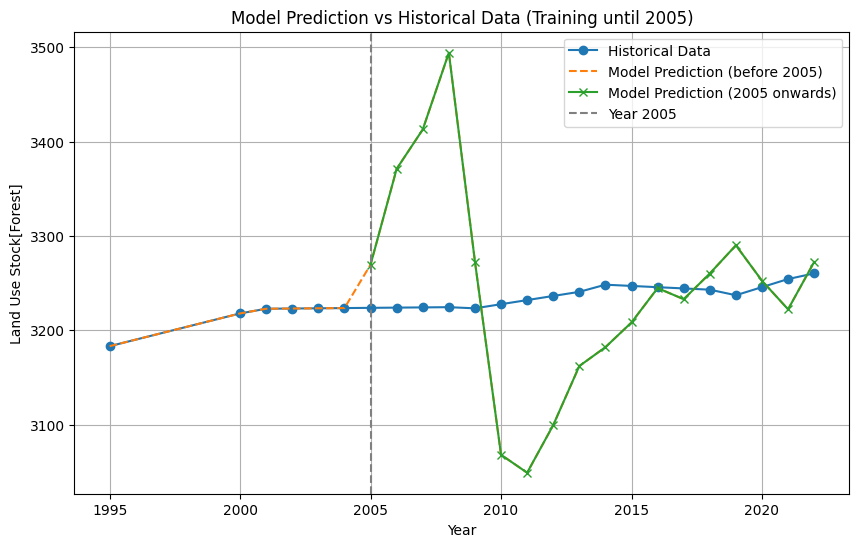

MAPE for Historical Data (before 2006): 0.00%
MAPE for Future Data (2006 onwards): 0.71%
MAPE for Entire Dataset: 0.50%


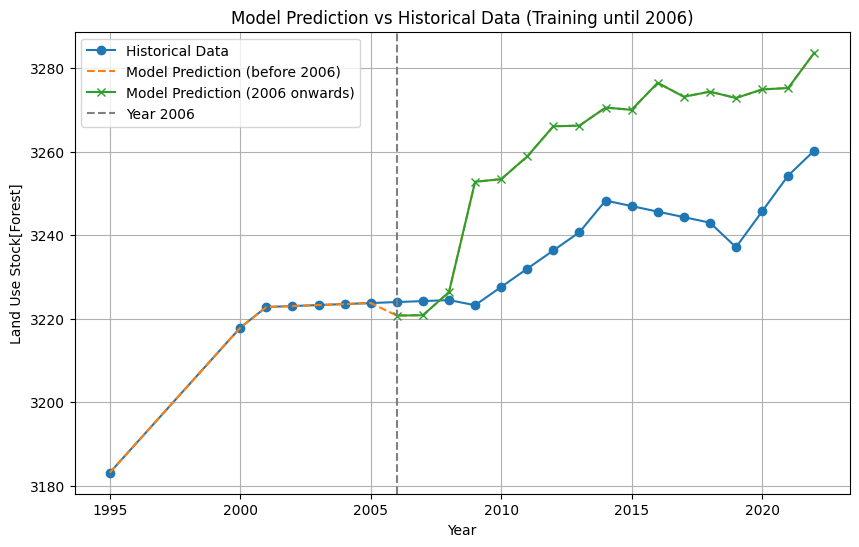

MAPE for Historical Data (before 2007): 0.00%
MAPE for Future Data (2007 onwards): 0.79%
MAPE for Entire Dataset: 0.53%


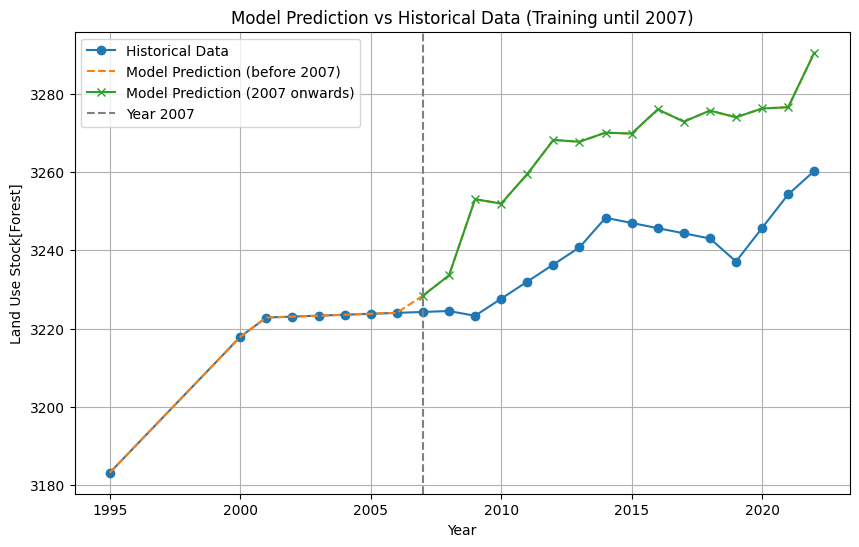

MAPE for Historical Data (before 2008): 0.00%
MAPE for Future Data (2008 onwards): 0.75%
MAPE for Entire Dataset: 0.47%


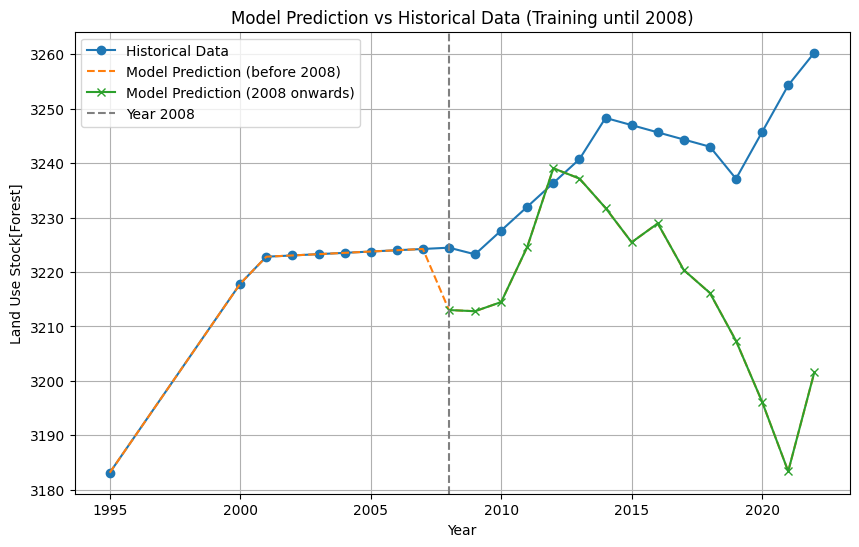

MAPE for Historical Data (before 2009): 0.00%
MAPE for Future Data (2009 onwards): 0.28%
MAPE for Entire Dataset: 0.16%


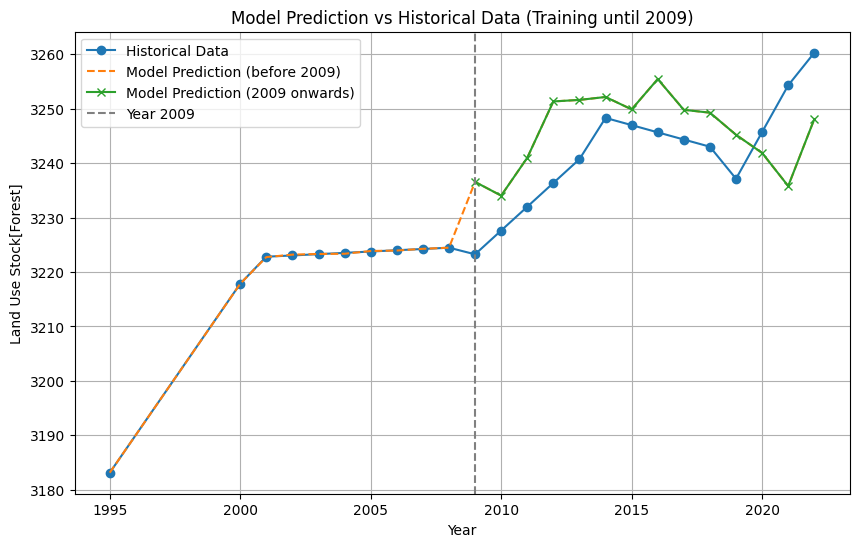

MAPE for Historical Data (before 2010): 0.02%
MAPE for Future Data (2010 onwards): 0.64%
MAPE for Entire Dataset: 0.35%


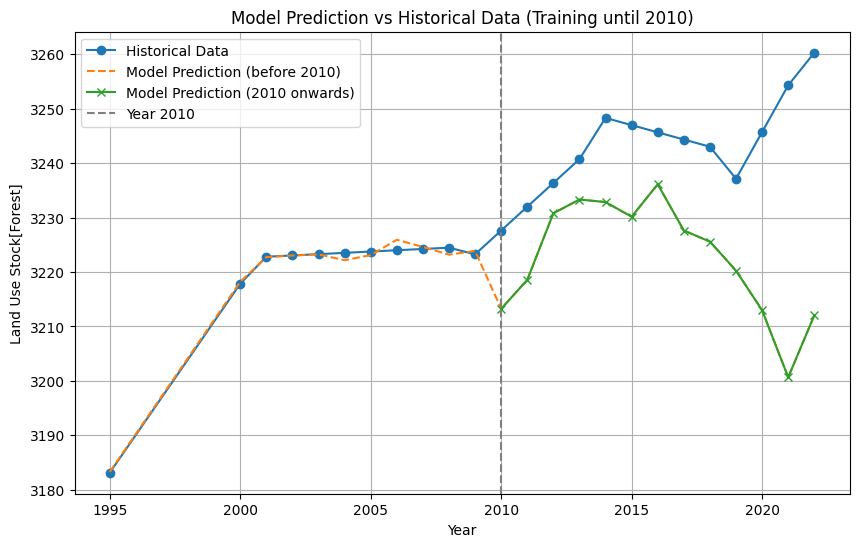

MAPE for Historical Data (before 2011): 0.03%
MAPE for Future Data (2011 onwards): 0.46%
MAPE for Entire Dataset: 0.25%


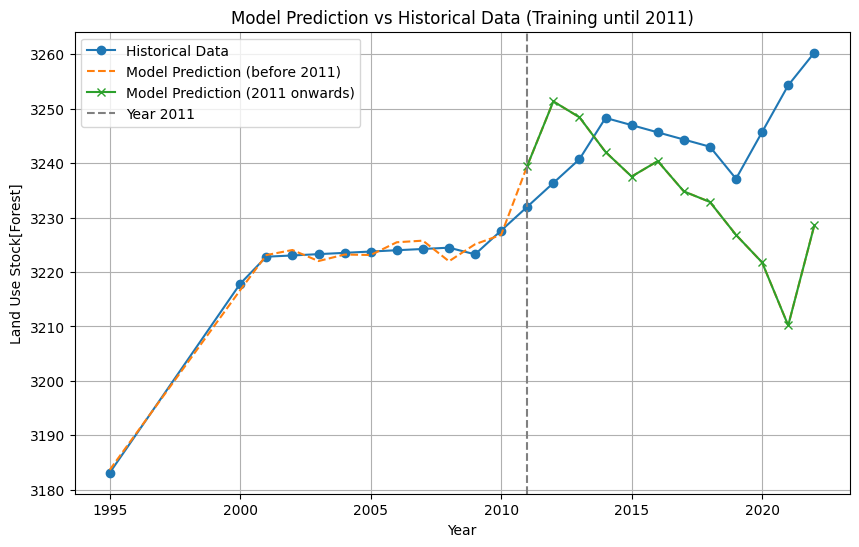

MAPE for Historical Data (before 2012): 0.04%
MAPE for Future Data (2012 onwards): 0.42%
MAPE for Entire Dataset: 0.21%


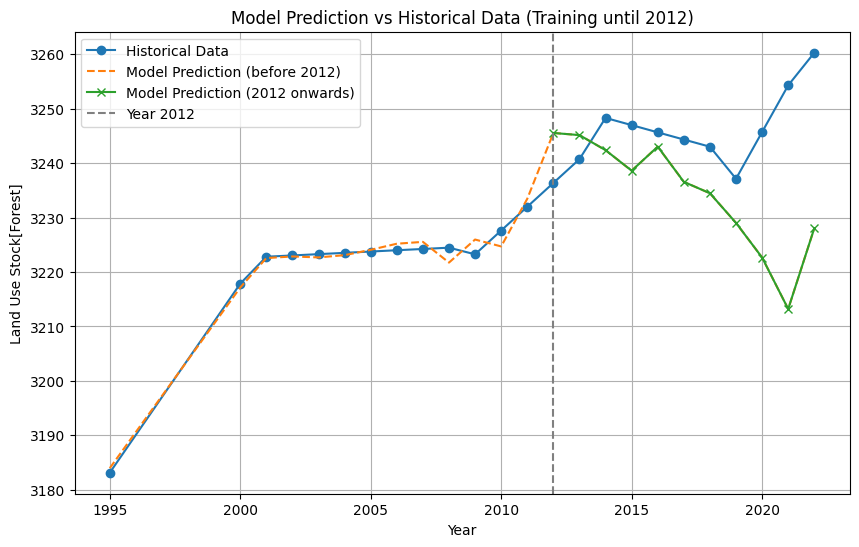

MAPE for Historical Data (before 2013): 0.05%
MAPE for Future Data (2013 onwards): 0.39%
MAPE for Entire Dataset: 0.19%


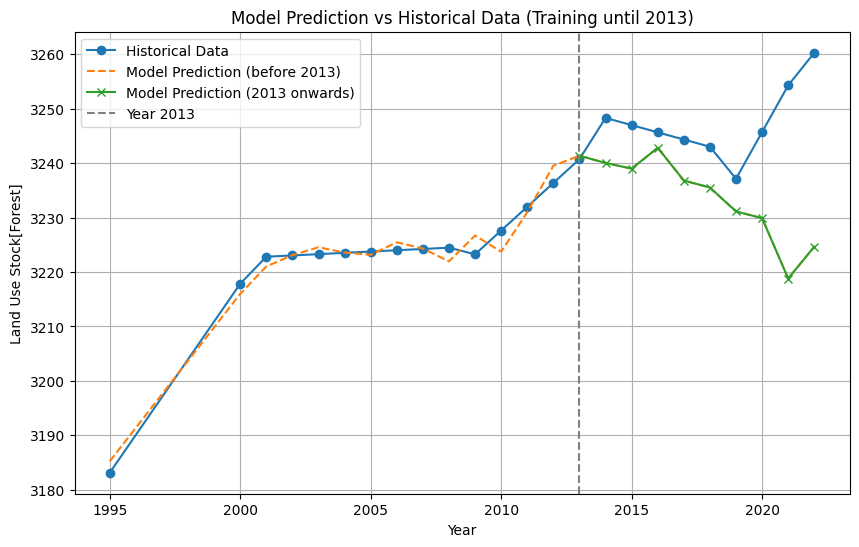

MAPE for Historical Data (before 2014): 0.05%
MAPE for Future Data (2014 onwards): 0.44%
MAPE for Entire Dataset: 0.20%


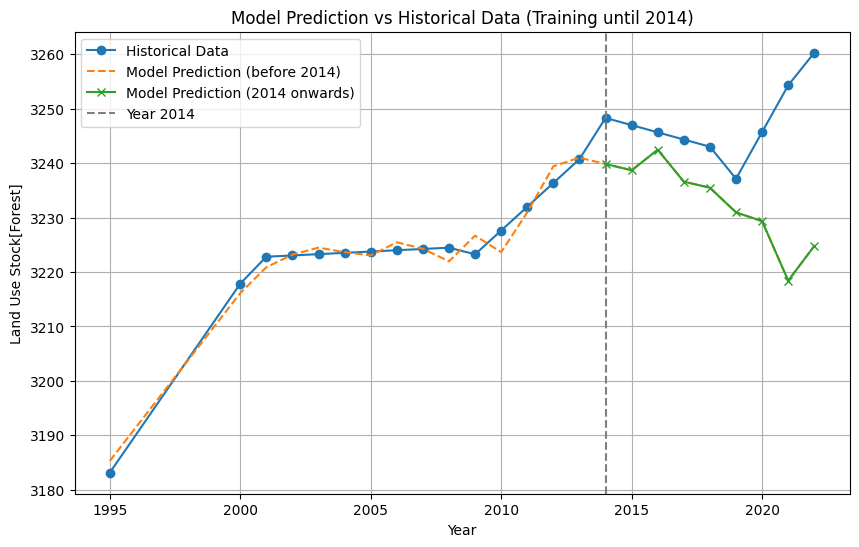

MAPE for Historical Data (before 2015): 0.06%
MAPE for Future Data (2015 onwards): 0.33%
MAPE for Entire Dataset: 0.15%


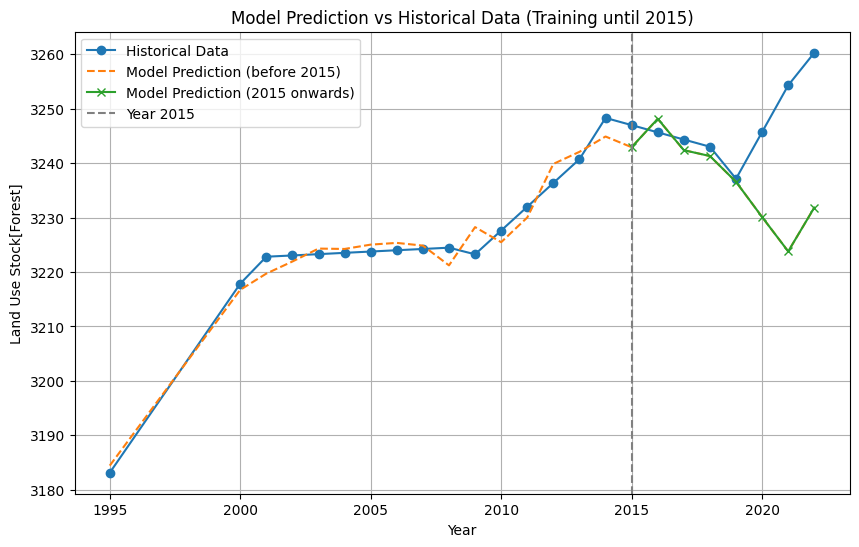

MAPE for Historical Data (before 2016): 0.07%
MAPE for Future Data (2016 onwards): 0.31%
MAPE for Entire Dataset: 0.14%


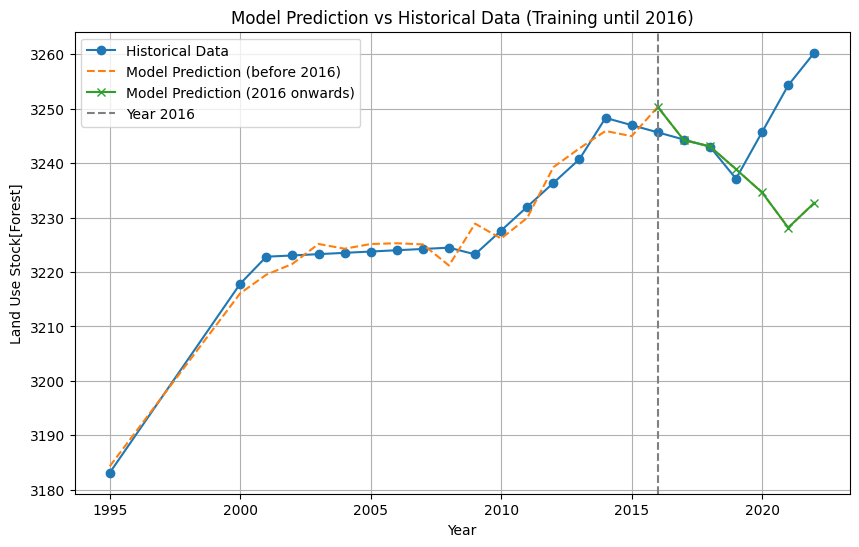

MAPE for Historical Data (before 2017): 0.07%
MAPE for Future Data (2017 onwards): 0.38%
MAPE for Entire Dataset: 0.14%


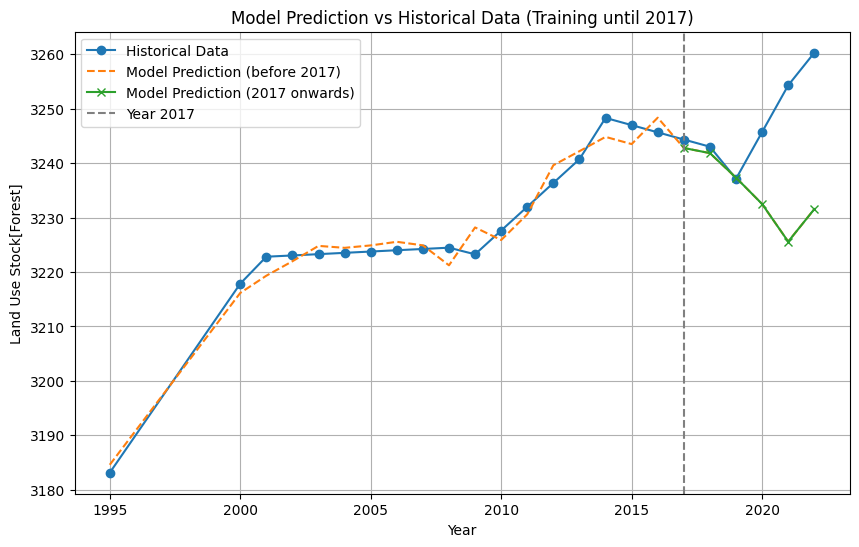

MAPE for Historical Data (before 2018): 0.07%
MAPE for Future Data (2018 onwards): 0.43%
MAPE for Entire Dataset: 0.14%


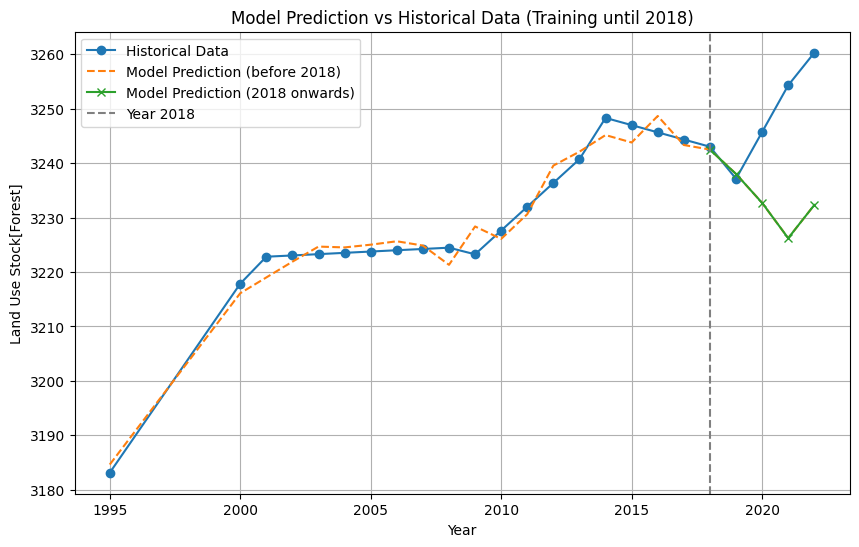

MAPE for Historical Data (before 2019): 0.06%
MAPE for Future Data (2019 onwards): 0.53%
MAPE for Entire Dataset: 0.14%


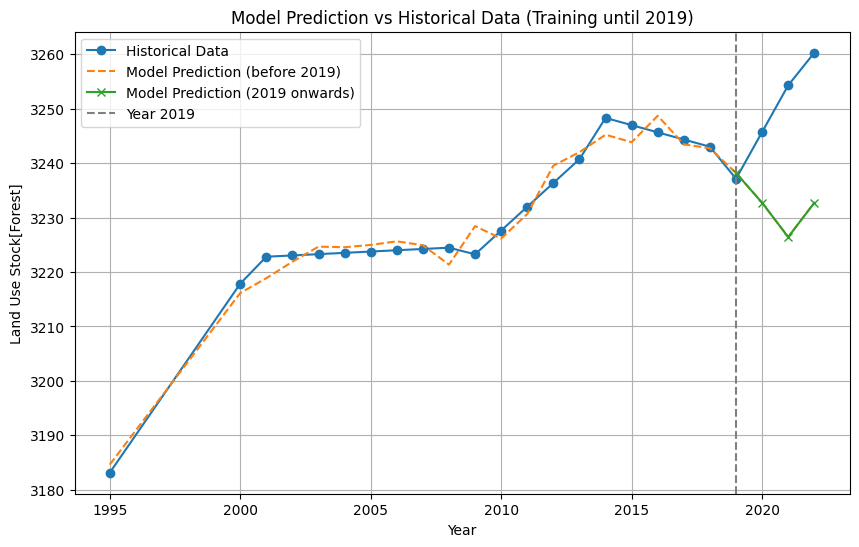

MAPE for Historical Data (before 2020): 0.06%
MAPE for Future Data (2020 onwards): 0.72%
MAPE for Entire Dataset: 0.14%


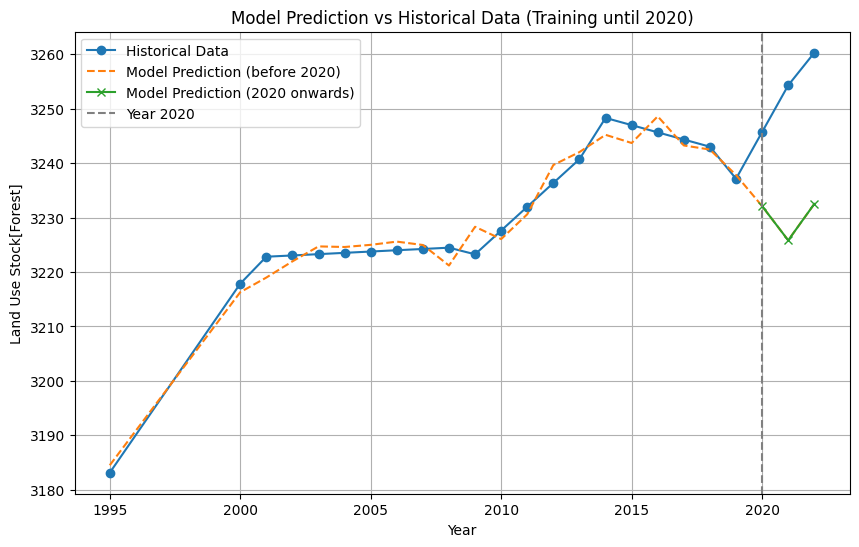

MAPE for each year:
Year 2005:
 Historical MAPE: 0.00%,
 Future MAPE: 2.57%,
 Entire Dataset MAPE: 1.93%

Year 2006:
 Historical MAPE: 0.00%,
 Future MAPE: 0.71%,
 Entire Dataset MAPE: 0.50%

Year 2007:
 Historical MAPE: 0.00%,
 Future MAPE: 0.79%,
 Entire Dataset MAPE: 0.53%

Year 2008:
 Historical MAPE: 0.00%,
 Future MAPE: 0.75%,
 Entire Dataset MAPE: 0.47%

Year 2009:
 Historical MAPE: 0.00%,
 Future MAPE: 0.28%,
 Entire Dataset MAPE: 0.16%

Year 2010:
 Historical MAPE: 0.02%,
 Future MAPE: 0.64%,
 Entire Dataset MAPE: 0.35%

Year 2011:
 Historical MAPE: 0.03%,
 Future MAPE: 0.46%,
 Entire Dataset MAPE: 0.25%

Year 2012:
 Historical MAPE: 0.04%,
 Future MAPE: 0.42%,
 Entire Dataset MAPE: 0.21%

Year 2013:
 Historical MAPE: 0.05%,
 Future MAPE: 0.39%,
 Entire Dataset MAPE: 0.19%

Year 2014:
 Historical MAPE: 0.05%,
 Future MAPE: 0.44%,
 Entire Dataset MAPE: 0.20%

Year 2015:
 Historical MAPE: 0.06%,
 Future MAPE: 0.33%,
 Entire Dataset MAPE: 0.15%

Year 2016:
 Historical MAPE: 0.07%

In [26]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file into a DataFrame
df = pd.read_excel('simple-land.xlsx')

# Initialize lists to store results
coefficients_list = []
mape_list = []

# Get the last year in the dataset
last_year = df['Year'].max()

# Loop through years from 2005 to 2020
for yr in range(2005, 2021):
    # Filter the data for years before yr for training
    df_train = df[df['Year'] < yr]

    # Data from yr onwards for validation and future prediction
    df_validate = df[(df['Year'] >= yr) & (df['Year'] <= last_year)]

    # Select the relevant columns
    features_columns = [col for col in df.columns if "Factors History" in col]
    X_train = df_train[features_columns]
    y_train = df_train['Land Use Stock[Forest]']

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the entire dataset (before yr for training and yr onward for validation)
    df['Predicted Land Use Stock[Forest]'] = model.predict(df[features_columns])

    # Make predictions on the validation set (years yr and onward)
    X_validate = df_validate[features_columns]
    y_validate = df_validate['Land Use Stock[Forest]']
    y_pred = model.predict(X_validate)

    # Calculate MAPE for Historical Data (before yr)
    historical_mape = mean_absolute_percentage_error(df[df['Year'] < yr]['Land Use Stock[Forest]'], 
                                                     df[df['Year'] < yr]['Predicted Land Use Stock[Forest]']) * 100
    print(f"MAPE for Historical Data (before {yr}): {historical_mape:.2f}%")

    # Calculate MAPE for Future Data (yr onwards and within the actual data range)
    future_mape = mean_absolute_percentage_error(y_validate, y_pred) * 100
    print(f"MAPE for Future Data ({yr} onwards): {future_mape:.2f}%")

    # Calculate MAPE for the Entire Dataset (up to the last available year)
    entire_mape = mean_absolute_percentage_error(df[df['Year'] <= last_year]['Land Use Stock[Forest]'], 
                                                 df[df['Year'] <= last_year]['Predicted Land Use Stock[Forest]']) * 100
    print(f"MAPE for Entire Dataset: {entire_mape:.2f}%")

    # Store MAPE in the list
    mape_list.append((yr, f"Historical MAPE: {historical_mape:.2f}%", 
                      f"Future MAPE: {future_mape:.2f}%", 
                      f"Entire Dataset MAPE: {entire_mape:.2f}%"))

    # Store the coefficients in the list
    coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
    coefficients['Year'] = yr
    coefficients_list.append(coefficients)

    # Plotting the results including model values before yr, only up to the last available year
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df['Land Use Stock[Forest]'], label='Historical Data', marker='o')
    plt.plot(df['Year'], df['Predicted Land Use Stock[Forest]'], label=f'Model Prediction (before {yr})', linestyle='--')
    plt.plot(df_validate['Year'], y_pred, label=f'Model Prediction ({yr} onwards)', marker='x')
    plt.axvline(x=yr, color='gray', linestyle='--', label=f'Year {yr}')
    plt.xlabel('Year')
    plt.ylabel('Land Use Stock[Forest]')
    plt.title(f'Model Prediction vs Historical Data (Training until {yr})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine all coefficients into a single DataFrame for output
all_coefficients = pd.concat(coefficients_list, ignore_index=True)

# Display MAPE and coefficients
print("MAPE for each year:")
for year, hist_mape, fut_mape, ent_mape in mape_list:
    print(f"Year {year}:\n {hist_mape},\n {fut_mape},\n {ent_mape}\n")

print("\nCoefficients for each year:")
print(all_coefficients)
